In [ ]:
from flask import Flask, render_template
import matplotlib.pyplot as plt
import io
import base64
import csv

app = Flask(__name__)

@app.route('/')
def index():
    # 從 CSV 檔案讀取資料
    dates = []
    prices = []
    with open('data.csv', 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            dates.append(row[0])
            prices.append(int(row[1]))

    # 繪製圖表
    plt.plot(dates, prices)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Price Trend')
    plt.xticks(rotation=45)
    
    # 將圖表轉換為 base64 字串
    img = io.BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)
    plot_url = base64.b64encode(img.getvalue()).decode()

    return render_template('index.html', plot_url=plot_url)

if __name__ == '__main__':
    app.run(debug=True)

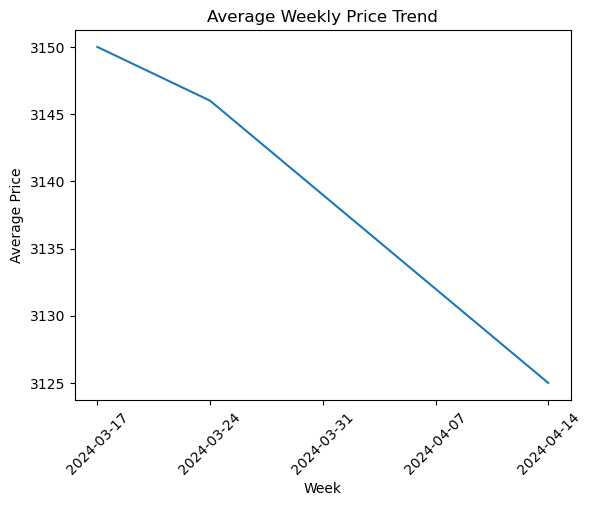

In [15]:
import matplotlib.pyplot as plt
import csv
from datetime import datetime, timedelta

# 從 CSV 檔案讀取資料
dates = []
prices = []
with open('priceTest.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # 跳過第一行（標題）
    for row in csvreader:
        dates.append(datetime.strptime(row[0], '%Y-%m-%d'))  # 將日期轉換為 datetime 物件
        prices.append(float(row[1]))  # 將價格轉換為浮點數

# 將日期分組為每週
weekly_dates = []
weekly_prices = []
current_week_dates = []
current_week_prices = []
current_week_number = dates[0].isocalendar()[1]  # 第一天的週數
for date, price in zip(dates, prices):
    week_number = date.isocalendar()[1]
    if week_number == current_week_number:
        current_week_dates.append(date)
        current_week_prices.append(price)
    else:
        weekly_dates.append(current_week_dates)
        weekly_prices.append(current_week_prices)
        current_week_dates = [date]
        current_week_prices = [price]
        current_week_number = week_number

# 將每週價格計算為平均值
average_weekly_prices = [sum(prices) / len(prices) for prices in weekly_prices]

# 繪製圖表
plt.plot(average_weekly_prices)
plt.xlabel('Week')
plt.ylabel('Average Price')
plt.title('Average Weekly Price Trend')

# 設置 X 軸標籤為每週的日期範圍
xticks_labels = []
for week_dates in weekly_dates:
    xticks_labels.append(week_dates[-1].strftime('%Y-%m-%d'))
plt.xticks(range(len(average_weekly_prices)), xticks_labels, rotation=45)

plt.show()
